In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats 
%matplotlib inline
import math
import time

<h1> <center >Dans ce projet, on va s'intéresser à l'étude des solutions des EDS de type CEV qui ont la forme suivante : </center> </h1>




<h3> <center> $dX_{t}=b(X_{t})dt+\sigma |X_{t}|^{\alpha}dW_{t}$   </center> </h3> 

- $\alpha \in [\frac{1}{2},1[$
- $x_{0} > 0$
- $\sigma > 0$

On va montrer que lorsque le rapport $\frac{b_{0}}{\sigma^{2}}$ est $\textbf{"assez élevé"}$ et que la fonction $b$ est assez régulière, on montre un ordre de convergence de 1 comme dans le cas classique des schémas de Milstein avec les coefficient Lipschitz et à croissance linéaire $C^{2}$ ce qui n'est pas le cas ici. Ainsi, l'hypothèse classique pour les ordres de convergence dans les schémas de Milstein ne s'appliquant pas ici, il n'est pas clair que l'on puisse retrouver un ordre de convergence de 1.


<h3> Introduction aux différents schémas de discrétisation  : </h3>

On introduit ici les différents schémas de discrétisation qui vont nous servir lors de l'implémentation avec une grille de temps donnée par $[0=t_{0},t_{1},...,t_{N}=T]$

<h5> Schéma SMS (Symetrized Milstein Scheme) : </h5>

- $\hat{X_{t_{0}}}=x_{0}$
- $\hat{X_{t_{k}}}=|\hat{X_{t_{k-1}}}+b(\hat{X_{t_{k-1}}})\Delta_{t}+\sigma \hat{X_{t_{k-1}}}(W_{t_{k}}-W_{t_{k-1}})+\alpha \frac{\sigma^{2}}{2}\hat{X_{t_{k}-1}}^{2 \alpha -1}[(W_{t_{k}}-W_{t_{k-1}})^{2}-\Delta t]|$ pour $k \in [1,N]$


<h5> Schéma SES (Symetrized Euler Scheme): </h5>


- $\hat{X_{t_{0}}}=x_{0}$
- $\hat{X_{t_{k}}}=|\hat{X_{t_{k-1}}}+b(\hat{X_{t_{k-1}}})\Delta_{t}+\sigma \hat{X_{t_{k-1}}}(W_{t_{k}}-W_{t_{k-1}})|$ pour $k \in [1,N]$


<h5> Schéma AIS : </h5>

Dans le cas $\alpha=0.5$, on introduit le schéma AIS dans le cadre d'un processus CIR comme suit :

$dX_{t}=(a-\kappa X_{t})dt+\sigma \sqrt{X_{t}}dW_{t}$

On définit alors le processus $X_{t}=Y_{t}^{2}$, bien défini par la condition de Feller supposée satisfaite

- $\hat{Y_{t_{0}}}=\sqrt{x_{0}}$
- $\hat{Y_{t_{k}}}=\frac{\hat{Y_{t_{k-1}}}+\frac{\sigma}{2}(W_{t_{k}}-W_{t_{k-1}})+\sqrt{(\hat{Y_{t_{k-1}}}+\frac{\sigma}{2}(W_{t_{k}}-W_{t_{k-1}}))^{2}+2(1+\frac{\kappa}{2}(t_{k}-t_{k-1}))(a-\frac{\sigma^{2}}{4})(t_{k} -t_{k-1})}}{2(1+\frac{\kappa}{2}(t_{k}-t_{k-1}))}$  pour $k \in [1,N]$
- $\hat{X_{t_{k}}}=\hat{Y_{t_{k}}}^{2}$ 



<h3> But du projet : </h3>

Dans le cadre du projet, on va comme dans l'article supposer que la fonction "drift" est linéaire donnée par : $b(x)=10-10x$. On va également considérer un horizon temporel $T=1$ et $x_{0}=1$

Nous allons nous intéresser à l'implémentation numérique des différents schémas numériques dans le cadre premièrement : $\alpha >0.5$ où nous étudierons les schémas $SMS$ et $SES$ et leurs ordres de convergence dans différentes configurations sur le choix du rapport $\frac{b_{0}}{\sigma^{2}}$ par rapport à  une fonction de $\alpha$ puis dans le cas $\alpha=0.5$ où nous étudierons les schémas $SMS$,$SES$ et $AIS$ où les conditions de convergence ne sont pas les mêmes que dans le cas $\alpha > 0.5$.

Pour le calcul des ordres de convergence, on va chercher à estimer la norme $L^{1}$ associée à chaque schéma constituant l'erreur forte. En notant $F_{T}=|X_{T}-\hat{X}_{T}|$ classiquement avec $\hat{X}_{T}$ issue du schéma de discrétisation et $X_{T}$ la vraie solution, on veut donc estimateur $E[F_{T}]$ pour chacun des schémas introduits.


- Comme il n'y a pas de solution explicite pour les différents schémas que l'on étudie, on va se donner dans le cas $\alpha=\frac{1}{2}$ comme solution de référence $X_{T}$ issue d'un schéma $AIS$ approximé avec un pas de temps de $\Delta t=\frac{\Delta_{max}}{2^{9}}$ (pour accélérer le temps d'éxécution)
- Dans le cas $\alpha > \frac{1}{2}$, on va se donner  comme solution de référence $X_{T}$ un schéma $SMS$ approximé avec un pas de temps de $\Delta t=\frac{\Delta_{max}}{2^{9}}$ ( pour accélérer le temps d'éxécution)

Ensuite, pour chaque $\Delta t \in [ {\frac{\Delta_{max}}{2^{n}}, n \in [1,9]}$], on va estimer les espérances par les moyennes empiriques pour chaque schéma en simulant ($\textbf{5000 trajectoires}$ par soucis de temps de calcul) et afin d'observer l'ordre de convergence, on va effectuer la régression linéaire de $log(F_{T})$ par rapport à $log(\Delta t)$ et le coefficient directeur représentera l'ordre de convergence et on représentera également graphiquement ces courbes. On introduira également la fonction $\textbf{Identité}$ qui a un coefficient directeur de 1 qui servira de référence.














<h3>Implémentation dans le cadre $\alpha > 0.5$ </h3>
    
On a donc dans le cadre de l'implémentation l'EDS suivante :
    
    
$dX_{t}=(10-10X_{t})dt+\sigma |X_{t}|^{\alpha}dW_{t}$
    
   
On va ensuite tester donc différentes configurations pour voir l'impact sur l'ordre de convergence:
    
- Dans le cas du SMS, on a l'ordre théorique de 1 si : $\frac{b(0)}{\sigma^{2}}>2\alpha(1-\alpha)^{2}$
- Dans le cas du SES, on a l'ordre théorique de $\frac{1}{2}$ si : $b(0)>0$

    
    


    

In [7]:
# Cas Alpha > 0.5.
x0=1
T=1
RNG = np.random.default_rng() # device to generate pseudo random number

def estimate_strong_error_CEV(M,sigma,alpha,size,schema,rng): 
    
    # M constitue le nombre de Simulations 
    # alpha le paramètre dans le modèle CEV
    #schema correspond au type de schéma considéré (SMS,SES,etc...)
    # size est un tableau contenant des entiers pour le calcul des pas de discrétisation comme défini dans l'article 
    # Delta_t=Puissance de 2*DeltaMax
    deltamax=0.01 # J'initialise la valeur comme dans larticle pour obtenir les mêmes graphiques
    delta=deltamax/pow(2,9) # Pas de discrétisation pour la solution de référence ( 2^9 et non 2^12 comme dans l'article pour accélérer les calculs)
    Calc={} # Dictionnaire qui va stocker pour chaque type de simulation, le pas associé et la valeur terminale qui va construire de proche en proche
    delta1=[] # Tableau qui va contenir les différents delta_t comme définie dans l'article ( puissance de 2*Delta max)
    error=[] # contiendra l'erreur
    std_error=[] # contient variance
    N=int(np.round(T/(delta))) # Nombre de pas dans la discrétisation
    #print(N)
    for element in size: # Je crée Calc avc son pas associé en 1er élément, Xpi en 2ème élément ( et je m'intéresserais à Xpi_T) et un tableau en dernière
        # élement pour calculer les incréments gaussiens car ça dépend de la trajectoire
        Calc[element]=[delta*element,x0*np.ones(M),np.zeros(M)]
    X=x0*np.ones(M) # Solution de référence 
    for n in tqdm(range(1,N+1)):
            Gauss=rng.normal(loc=0,scale=1,size=M)
            X=abs(X+(10-10*X)*delta+sigma*pow(X,alpha)*np.sqrt(delta)*Gauss+(alpha*pow(sigma,2)/2)*pow(X,2*alpha-1)*(delta*pow(Gauss,2)-delta))
            if schema=="SES":
                for element in size:
                    if n%element!=0: 
                        Calc[element][2]+=Gauss
                    else:
                        Calc[element][2]+=Gauss
                        diff=np.sqrt(Calc[element][0]/element)*Calc[element][2] # Calcul de l'incrément de gaussien (Wtk-Wtk-1)
                        Calc[element][1]=abs(Calc[element][1]+(10-10*Calc[element][1])*Calc[element][0]+sigma*pow(Calc[element][1],alpha)*diff)
                        Calc[element][2]=np.zeros(M)
            if schema=="SMS":
                for element in size:
                    if n%element!=0: 
                        Calc[element][2]+=np.sqrt(delta)*Gauss # On ajoute la loi normale centrée réduite
                    else:
                        Calc[element][2]+=np.sqrt(delta)*Gauss # On ajoute une dernière fois une loi normale centrée réduite avant de retomber à 0.
                        diff=Calc[element][2]
                        # Calcul de l'incrément de gaussien (Wtk-Wtk-1)
                        Calc[element][1]=abs(Calc[element][1]+(10-10*Calc[element][1])*Calc[element][0]+sigma*pow(Calc[element][1],alpha)*diff+(alpha*pow(sigma,2)/2)*pow(Calc[element][1],2*alpha-1)*(pow(diff,2)-Calc[element][0]))
                        Calc[element][2]=np.zeros(M) 

    #print(X)
    for element in size:
        #print(Calc[element][1])
        DX=np.abs(X-Calc[element][1]) 
        e_strong_error = np.mean(DX) # estimator for stongr
        stderror = np.std(DX)/np.sqrt(M) # stdev of the estimator
        error.append(e_strong_error)
        std_error.append(stderror)
        delta1.append(Calc[element][0]) # Les Pas ici
    return(error, std_error,delta1)

<h1> Resultat Graphiques : </h1>

100%|██████████████████████████████████████████████████████████████████████████| 51200/51200 [00:31<00:00, 1630.46it/s]


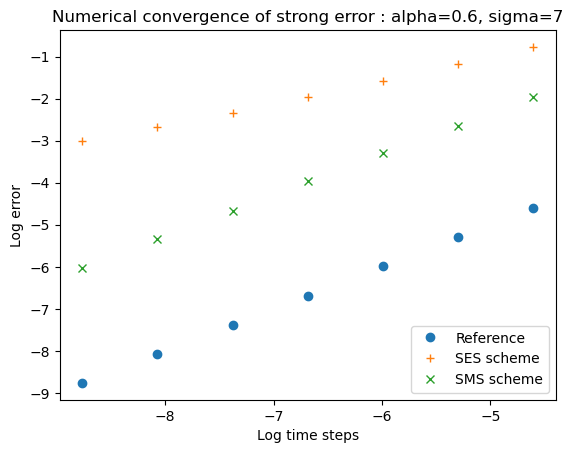

In [9]:
from sklearn.metrics import r2_score


error,std_error,delta=estimate_strong_error_CEV(5000,7,0.6,[8,16,32,64,128,256,512],"SES",RNG)
x=np.log(delta)
y=np.log(error)
error1,std_error,delta=estimate_strong_error_CEV(5000,7,0.6,[8,16,32,64,128,256,512],"SMS",RNG)
ySMS=np.log(error1)
plt.plot(x,x,'o',label='Reference')

plt.plot(x,y,'+',label='SES scheme')
plt.plot(x,ySMS,'x',label="SMS scheme")
m, b = np.polyfit(x, y, 1)
Z,l=np.polyfit(x,ySMS,1)
label_fit="Fit {:1.2f}".format(Z)
label_fit="Fit {:1.2f}".format(m)
r2_SES = r2_score(y, m * x + b)
r2_SMS = r2_score(ySMS, Z * x + l)

# Affichage des résultats
#label_fit_SES = f"Fit SES: {m:.2f}, R²: {r2_SES:.2f}"
#label_fit_SMS = f"Fit SMS: {Z:.2f}, R²: {r2_SMS:.2f}"

#plt.plot(x, m*x + b,label=label_fit)
#plt.plot(x, Z*x + l,label=label_fit)

k=0.6
n=7

plt.title("Numerical convergence of strong error : alpha={}, sigma={}".format(k,n))
plt.ylabel("Log error")
plt.xlabel("Log time steps")
plt.legend(loc="lower right")
plt.show()


<h4> On vérifie si la condition pour la convergence théorique est vérifiée : </h4>



In [11]:
10/(pow(n,2))>2*k*pow(1-k,2) # Condition vérifiée donc on observe bien le cadre théorique

True

In [10]:
print("Les R2 du SMS et SES sont respectivement {} et {} ".format(r2_SMS,r2_SES))
print("Les p empiriques du SMS et SES sont respectivement {} et {} ".format(Z,m))

Les R2 du SMS et SES sont respectivement 0.9999100669995016 et 0.9985925331276766 
Les p empiriques du SMS et SES sont respectivement 0.9735676076646026 et 0.5416517426965838 


In [97]:
print("Les R2 du SMS et SES sont respectivement {} et {} ".format(r2_SMS,r2_SES))
print("Les p empiriques du SMS et SES sont respectivement {} et {} ".format(Z,m))

Les R2 du SMS et SES sont respectivement 0.9999058503226866 et 0.9977372868188484 
Les p empiriques du SMS et SES sont respectivement 0.9738750928506729 et 0.5303534420973491 


100%|██████████████████████████████████████████████████████████████████████████| 51200/51200 [00:28<00:00, 1768.96it/s]


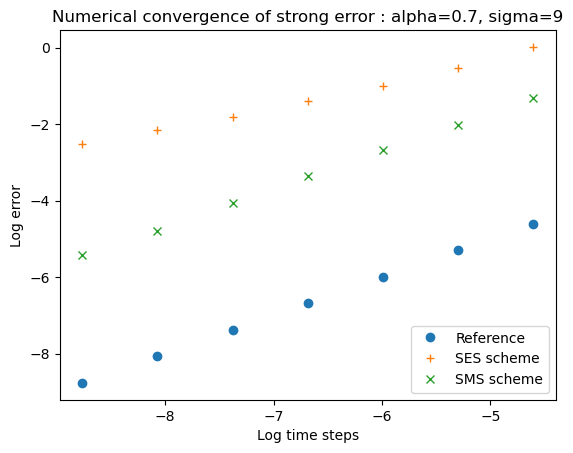

slope =  0.6006352952794082


In [13]:
error,std_error,delta=estimate_strong_error_CEV(5000,9,0.7,[8,16,32,64,128,256,512],"SES",RNG)
x=np.log(delta)
y=np.log(error)
error1,std_error,delta=estimate_strong_error_CEV(5000,9,0.7,[8,16,32,64,128,256,512],"SMS",RNG)
ySMS=np.log(error1)
plt.plot(x,x,'o',label='Reference')
plt.plot(x,y,'+',label='SES scheme')
plt.plot(x,ySMS,'x',label="SMS scheme")
m, b = np.polyfit(x, y, 1)
Z,l=np.polyfit(x,ySMS,1)
label_fit="Fit {:1.2f}".format(Z)
label_fit="Fit {:1.2f}".format(m)
r2_SES = r2_score(y, m * x + b)
r2_SMS = r2_score(ySMS, Z * x + l)

# Affichage des résultats
#label_fit_SES = f"Fit SES: {m:.2f}, R²: {r2_SES:.2f}"
#label_fit_SMS = f"Fit SMS: {Z:.2f}, R²: {r2_SMS:.2f}"

#plt.plot(x, m*x + b,label=label_fit)
#plt.plot(x, Z*x + l,label=label_fit)

k=0.7
n=9

plt.title("Numerical convergence of strong error : alpha={}, sigma={}".format(k,n))
plt.ylabel("Log error")
plt.xlabel("Log time steps")
plt.legend(loc="lower right")
plt.show()


<h4> On vérifie si la condition pour la convergence théorique est vérifiée : </h4>


In [19]:
10/(pow(n,2))>=2*k*pow(1-k,2) # Condition non vérifiée mais proche de la limite théorique (0.123 vs 0.126)

False

In [15]:
print("Les R2 du SMS et SES sont respectivement {} et {} ".format(r2_SMS,r2_SES))
print("Les p empiriques du SMS et SES sont respectivement {} et {} ".format(Z,m))

Les R2 du SMS et SES sont respectivement 0.9998548084088706 et 0.9936856707833325 
Les p empiriques du SMS et SES sont respectivement 0.9940365241699689 et 0.6006352952794082 


100%|██████████████████████████████████████████████████████████████████████████| 51200/51200 [00:28<00:00, 1797.19it/s]


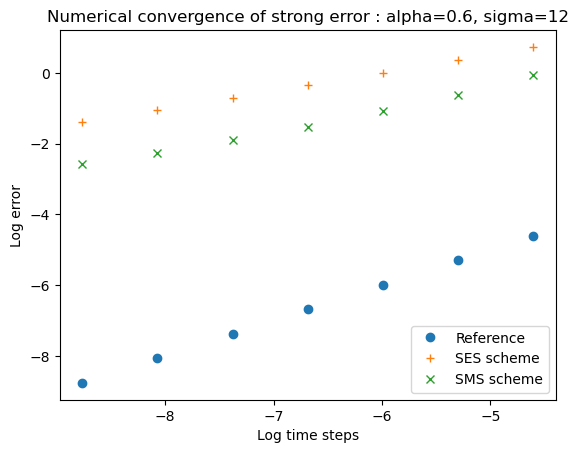

In [17]:
error,std_error,delta=estimate_strong_error_CEV(5000,12,0.6,[8,16,32,64,128,256,512],"SES",RNG)
x=np.log(delta)
y=np.log(error)
error1,std_error,delta=estimate_strong_error_CEV(5000,12,0.6,[8,16,32,64,128,256,512],"SMS",RNG)
ySMS=np.log(error1)
plt.plot(x,x,'o',label='Reference')

plt.plot(x,y,'+',label='SES scheme')
plt.plot(x,ySMS,'x',label="SMS scheme")
m, b = np.polyfit(x, y, 1)
Z,l=np.polyfit(x,ySMS,1)
label_fit="Fit {:1.2f}".format(Z)
label_fit="Fit {:1.2f}".format(m)
r2_SES = r2_score(y, m * x + b)
r2_SMS = r2_score(ySMS, Z * x + l)

# Affichage des résultats
#label_fit_SES = f"Fit SES: {m:.2f}, R²: {r2_SES:.2f}"
#label_fit_SMS = f"Fit SMS: {Z:.2f}, R²: {r2_SMS:.2f}"

#plt.plot(x, m*x + b,label=label_fit)
#plt.plot(x, Z*x + l,label=label_fit)

k=0.6
n=12

plt.title("Numerical convergence of strong error : alpha={}, sigma={}".format(k,n))
plt.ylabel("Log error")
plt.xlabel("Log time steps")
plt.legend(loc="lower right")
plt.show()


<h4> On vérifie si la condition pour la convergence théorique est vérifiée : </h4>


In [18]:
10/(pow(n,2))>2*k*pow(1-k,2) # Condition non vérifiée et on observe pas l'ordre de 1 ( 0.07 vs 0.192)

False

In [23]:
print("Les R2 du SMS et SES sont respectivement {} et {} ".format(r2_SMS,r2_SES))
print("Les p empiriques du SMS et SES sont respectivement {} et {} ".format(Z,m))

Les R2 du SMS et SES sont respectivement 0.9913295751769249 et 0.9997264894915436 
Les p empiriques du SMS et SES sont respectivement 0.6001817887034975 et 0.5099639870398817 


100%|██████████████████████████████████████████████████████████████████████████| 51200/51200 [00:28<00:00, 1822.28it/s]


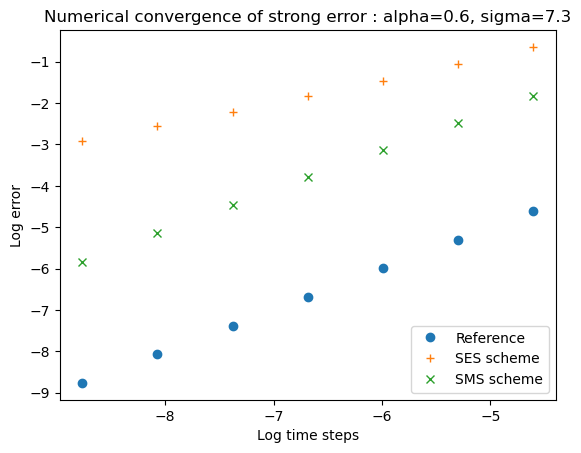

In [28]:
error,std_error,delta=estimate_strong_error_CEV(5000,np.sqrt(53.29),0.6,[8,16,32,64,128,256,512],"SES",RNG)
x=np.log(delta)
y=np.log(error)
error1,std_error,delta=estimate_strong_error_CEV(5000,np.sqrt(53.29),0.6,[8,16,32,64,128,256,512],"SMS",RNG)
ySMS=np.log(error1)
plt.plot(x,x,'o',label='Reference')

plt.plot(x,y,'+',label='SES scheme')
plt.plot(x,ySMS,'x',label="SMS scheme")
m, b = np.polyfit(x, y, 1)
Z,l=np.polyfit(x,ySMS,1)
label_fit="Fit {:1.2f}".format(Z)
label_fit="Fit {:1.2f}".format(m)
r2_SES = r2_score(y, m * x + b)
r2_SMS = r2_score(ySMS, Z * x + l)

# Affichage des résultats
#label_fit_SES = f"Fit SES: {m:.2f}, R²: {r2_SES:.2f}"
#label_fit_SMS = f"Fit SMS: {Z:.2f}, R²: {r2_SMS:.2f}"

#plt.plot(x, m*x + b,label=label_fit)
#plt.plot(x, Z*x + l,label=label_fit)

k=0.6
n=np.round(np.sqrt(53.29),2)

plt.title("Numerical convergence of strong error : alpha={}, sigma={}".format(k,n))
plt.ylabel("Log error")
plt.xlabel("Log time steps")
plt.legend(loc="lower right")
plt.show()


<h4> On vérifie si la condition pour la convergence théorique est vérifiée : </h4>


In [29]:
10/(pow(n,2))>2*k*pow(1-k,2) # Condition non vérifiée mais proche de la condition (0.187 vs 0.192) donc rate proche de 1

False

In [30]:
print("Les R2 du SMS et SES sont respectivement {} et {} ".format(r2_SMS,r2_SES))
print("Les p empiriques du SMS et SES sont respectivement {} et {} ".format(Z,m))

Les R2 du SMS et SES sont respectivement 0.999766110928193 et 0.9987855080673509 
Les p empiriques du SMS et SES sont respectivement 0.9647818987828247 et 0.5437384635969554 


100%|██████████████████████████████████████████████████████████████████████████| 51200/51200 [00:28<00:00, 1809.93it/s]


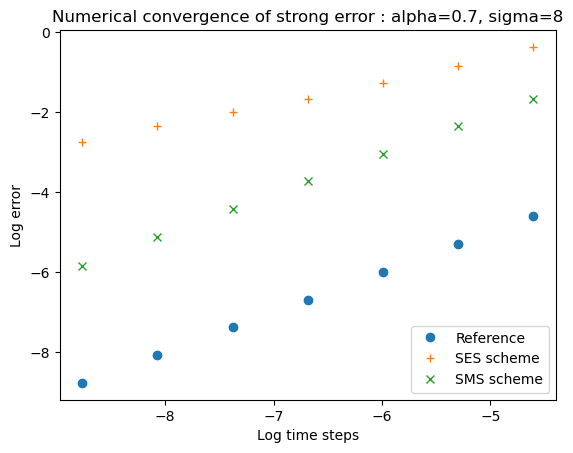

In [33]:
error,std_error,delta=estimate_strong_error_CEV(5000,8,0.7,[8,16,32,64,128,256,512],"SES",RNG)
x=np.log(delta)
y=np.log(error)
error1,std_error,delta=estimate_strong_error_CEV(5000,8,0.7,[8,16,32,64,128,256,512],"SMS",RNG)
ySMS=np.log(error1)
plt.plot(x,x,'o',label='Reference')

plt.plot(x,y,'+',label='SES scheme')
plt.plot(x,ySMS,'x',label="SMS scheme")
m, b = np.polyfit(x, y, 1)
Z,l=np.polyfit(x,ySMS,1)
label_fit="Fit {:1.2f}".format(Z)
label_fit="Fit {:1.2f}".format(m)
r2_SES = r2_score(y, m * x + b)
r2_SMS = r2_score(ySMS, Z * x + l)

# Affichage des résultats
#label_fit_SES = f"Fit SES: {m:.2f}, R²: {r2_SES:.2f}"
#label_fit_SMS = f"Fit SMS: {Z:.2f}, R²: {r2_SMS:.2f}"

#plt.plot(x, m*x + b,label=label_fit)
#plt.plot(x, Z*x + l,label=label_fit)

k=0.7
n=8

plt.title("Numerical convergence of strong error : alpha={}, sigma={}".format(k,n))
plt.ylabel("Log error")
plt.xlabel("Log time steps")
plt.legend(loc="lower right")
plt.show()


<h4> On vérifie si la condition pour la convergence théorique est vérifiée : </h4>


In [34]:
10/(pow(n,2))>2*k*pow(1-k,2) # Condition vérifiée donc on vérifie empiriquement celà

True

In [35]:
print("Les R2 du SMS et SES sont respectivement {} et {} ".format(r2_SMS,r2_SES))
print("Les p empiriques du SMS et SES sont respectivement {} et {} ".format(Z,m))

Les R2 du SMS et SES sont respectivement 0.9998975463029836 et 0.9961710071899955 
Les p empiriques du SMS et SES sont respectivement 1.0026753260634629 et 0.5560698198552237 


100%|██████████████████████████████████████████████████████████████████████████| 51200/51200 [00:29<00:00, 1752.06it/s]


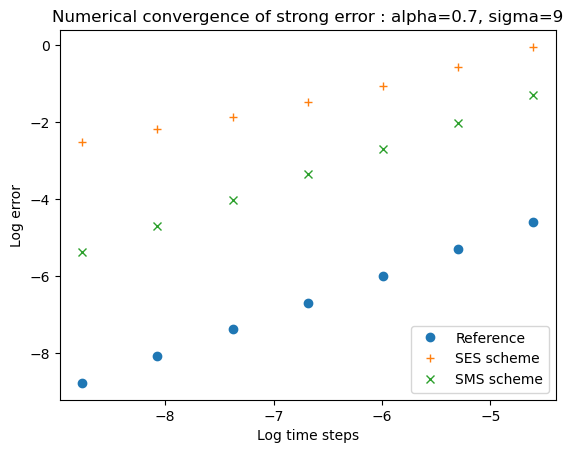

In [36]:
error,std_error,delta=estimate_strong_error_CEV(5000,9,0.7,[8,16,32,64,128,256,512],"SES",RNG)
x=np.log(delta)
y=np.log(error)
error1,std_error,delta=estimate_strong_error_CEV(5000,9,0.7,[8,16,32,64,128,256,512],"SMS",RNG)
ySMS=np.log(error1)
plt.plot(x,x,'o',label='Reference')

plt.plot(x,y,'+',label='SES scheme')
plt.plot(x,ySMS,'x',label="SMS scheme")
m, b = np.polyfit(x, y, 1)
Z,l=np.polyfit(x,ySMS,1)
label_fit="Fit {:1.2f}".format(Z)
label_fit="Fit {:1.2f}".format(m)
r2_SES = r2_score(y, m * x + b)
r2_SMS = r2_score(ySMS, Z * x + l)

# Affichage des résultats
#label_fit_SES = f"Fit SES: {m:.2f}, R²: {r2_SES:.2f}"
#label_fit_SMS = f"Fit SMS: {Z:.2f}, R²: {r2_SMS:.2f}"

#plt.plot(x, m*x + b,label=label_fit)
#plt.plot(x, Z*x + l,label=label_fit)

k=0.7
n=9

plt.title("Numerical convergence of strong error : alpha={}, sigma={}".format(k,n))
plt.ylabel("Log error")
plt.xlabel("Log time steps")
plt.legend(loc="lower right")
plt.show()


<h4> On vérifie si la condition pour la convergence théorique est vérifiée : </h4>


In [37]:
10/(pow(n,2))>2*k*pow(1-k,2) # Condition non vérifiée mais proche de la limite (0.123 vs 0.126) donc rate proche de 1

False

In [38]:
print("Les R2 du SMS et SES sont respectivement {} et {} ".format(r2_SMS,r2_SES))
print("Les p empiriques du SMS et SES sont respectivement {} et {} ".format(Z,m))

Les R2 du SMS et SES sont respectivement 0.9999240629532086 et 0.9909865740809528 
Les p empiriques du SMS et SES sont respectivement 0.973362996965481 et 0.5869888353379933 


100%|██████████████████████████████████████████████████████████████████████████| 51200/51200 [00:29<00:00, 1744.00it/s]


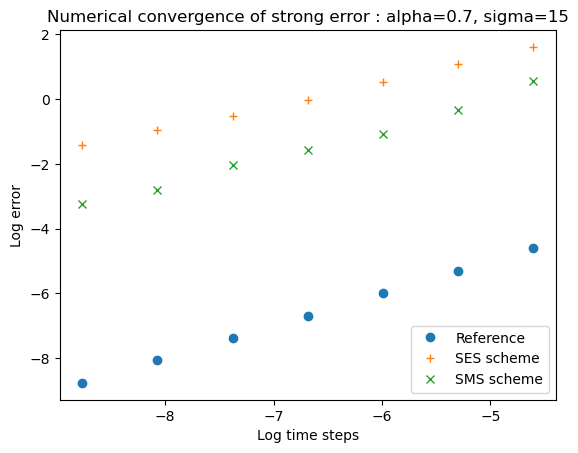

In [42]:
error,std_error,delta=estimate_strong_error_CEV(5000,15,0.7,[8,16,32,64,128,256,512],"SES",RNG)
x=np.log(delta)
y=np.log(error)
error1,std_error,delta=estimate_strong_error_CEV(5000,15,0.7,[8,16,32,64,128,256,512],"SMS",RNG)
ySMS=np.log(error1)
plt.plot(x,x,'o',label='Reference')

plt.plot(x,y,'+',label='SES scheme')
plt.plot(x,ySMS,'x',label="SMS scheme")
m, b = np.polyfit(x, y, 1)
Z,l=np.polyfit(x,ySMS,1)
label_fit="Fit {:1.2f}".format(Z)
label_fit="Fit {:1.2f}".format(m)
r2_SES = r2_score(y, m * x + b)
r2_SMS = r2_score(ySMS, Z * x + l)

# Affichage des résultats
#label_fit_SES = f"Fit SES: {m:.2f}, R²: {r2_SES:.2f}"
#label_fit_SMS = f"Fit SMS: {Z:.2f}, R²: {r2_SMS:.2f}"

#plt.plot(x, m*x + b,label=label_fit)
#plt.plot(x, Z*x + l,label=label_fit)

k=0.7
n=15

plt.title("Numerical convergence of strong error : alpha={}, sigma={}".format(k,n))
plt.ylabel("Log error")
plt.xlabel("Log time steps")
plt.legend(loc="lower right")
plt.show()


<h4> On vérifie si la condition pour la convergence théorique est vérifiée : </h4>


In [43]:
10/(pow(n,2))>2*k*pow(1-k,2) # Condition non vérifiée et on n'observe pas le rate de 1

False

In [44]:
print("Les R2 du SMS et SES sont respectivement {} et {} ".format(r2_SMS,r2_SES))
print("Les p empiriques du SMS et SES sont respectivement {} et {} ".format(Z,m))

Les R2 du SMS et SES sont respectivement 0.9901514917433024 et 0.9978932391811387 
Les p empiriques du SMS et SES sont respectivement 0.8888986405904836 et 0.7288062104864287 


<h3>Implémentation dans le cadre $\alpha = 0.5$ </h3>
    
On a donc dans le cadre de l'implémentation l'EDS suivante :
    
    
$dX_{t}=(10-10X_{t})dt+\sigma X_{t}^{\frac{1}{2}}dW_{t}$
    
   
On va ensuite tester donc différentes configurations pour voir l'impact sur l'ordre de convergence. On travaille ici avec la norme $L^{1}$ d'où :
    
- Dans le cas du SMS, on a l'ordre théorique de 1 si : $b(0)>\frac{9}{4} \sigma^{2}$
- Dans le cas du SES, on a l'ordre théorique de $\frac{1}{2}$ si : $b(0)>\frac{\sigma^{2}}{2}+\sqrt{2\sigma^{2}\kappa(1/2)}$ où $\kappa(1/2)=min(70,36\sigma^{2}) $
- Dans le cas du AIS, on a l'ordre théorique de 1 si : $ b(0) > \frac{3}{4}\sigma^{2}$

    

In [45]:
T=1
x0=1

def estimate_strong_error_alpha05_CEV(M,sigma,size,schema,rng):
    deltamax=0.025
    delta=deltamax/pow(2,12)
    Calc={}
    delta1=[]
    error=[] # contiendra l'erreur
    std_error=[]
    N=int(np.round(T/(delta)))
    #print(N)
    for element in size:
        Calc[element]=[delta*element,x0*np.ones(M),np.zeros(M),x0*np.ones(M)]
    Y=x0*np.ones(M)
    for n in tqdm(range(1,N+1)):
            Gauss=rng.normal(loc=0,scale=1,size=M)
            b=2+10*delta
            Y=(Y+(sigma*Gauss*np.sqrt(delta))/2+np.sqrt(pow(Y+(sigma*Gauss*np.sqrt(delta))/2,2)+b*(10-(pow(sigma,2)/4))*delta))/b
            X=Y**2
            if schema=="SES":
                for element in size:
                    if n%element!=0: 
                        Calc[element][2]+=Gauss
                    else:
                        Calc[element][2]+=Gauss
                        diff=np.sqrt(Calc[element][0]/element)*Calc[element][2] # Calcul de l'incrément de gaussien (Wtk-Wtk-1)
                        Calc[element][1]=abs(Calc[element][1]+(10-10*Calc[element][1])*Calc[element][0]+sigma*pow(Calc[element][1],0.5)*diff)
                        Calc[element][2]=np.zeros(M)
            if schema=="SMS":
                for element in size:
                    if n%element!=0: 
                        Calc[element][2]+=Gauss # On ajoute la loi normale centrée réduite
                    else:
                        Calc[element][2]+=Gauss # On ajoute une dernière fois une loi normale centrée réduite avant de retomber à 0.
                        #print(Calc[element][2])
                        diff=np.sqrt(Calc[element][0]/element)*Calc[element][2] # Calcul de l'incrément de gaussien (Wtk-Wtk-1)
                        #print(diff)
                        Calc[element][1]=abs(Calc[element][1]+(10-10*Calc[element][1])*Calc[element][0]+sigma*pow(Calc[element][1],0.5)*diff+(pow(sigma,2)/4)*(pow(diff,2)-Calc[element][0]))
                        Calc[element][2]=np.zeros(M) 
            if schema=="AIS":
                for element in size:
                    b=2+10*Calc[element][0]
                    if n%element!=0: 
                        Calc[element][2]+=np.sqrt(delta)*Gauss # On ajoute la loi normale centrée réduite
                    else:
                        Calc[element][2]+=np.sqrt(delta)*Gauss # On ajoute une dernière fois une loi normale centrée réduite avant de retomber à 0.
                        diff= Calc[element][2]  # Calcul de l'incrément de gaussien (Wtk-Wtk-1)
                        Calc[element][1]=(Calc[element][1]+(sigma*diff)/2+np.sqrt(pow(Calc[element][1]+(sigma*diff)/2,2)+b*(10-(pow(sigma,2)/4))*Calc[element][0]))/b
                        Calc[element][3]=Calc[element][1]**2
                        Calc[element][2]=np.zeros(M) 
                

    #print(X)
    for element in size:
        if schema=="AIS":
            #print(Calc[element][1])
            DX=np.abs(X-Calc[element][3])
        else:
            DX=np.abs(X-Calc[element][1])
        e_strong_error = np.mean(DX) # estimator for stongr
        stderror = np.std(DX)/np.sqrt(M) # stdev of the estimator
        error.append(e_strong_error)
        std_error.append(stderror)
        delta1.append(Calc[element][0])
    return(error, std_error,delta1)
     
            

In [48]:
error,std_error,delta=estimate_strong_error_alpha05_CEV(5000,1,[8,16,32,64,128,256],"SES",RNG)
x=np.log(delta)
ySESAIS=np.log(error)
error,std_error,delta=estimate_strong_error_alpha05_CEV(5000,1,[8,16,32,64,128,256],"SMS",RNG)
ySMSAIS=np.log(error)
error,std_error,delta=estimate_strong_error_alpha05_CEV(5000,1,[8,16,32,64,128,256],"AIS",RNG)
yAIS=np.log(error)

100%|████████████████████████████████████████████████████████████████████████| 163840/163840 [00:37<00:00, 4395.05it/s]


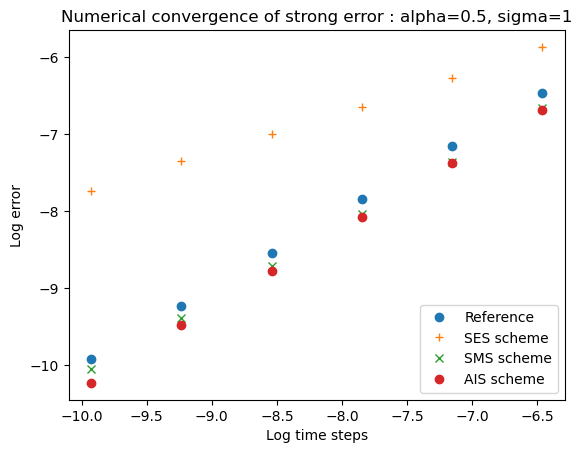

In [49]:
from sklearn.metrics import r2_score



plt.plot(x,x,'o',label='Reference')

plt.plot(x,ySESAIS,'+',label='SES scheme')
plt.plot(x,ySMSAIS,'x',label="SMS scheme")
plt.plot(x,yAIS,'o',label="AIS scheme")
m, b = np.polyfit(x, ySESAIS, 1)
Z,l=np.polyfit(x,ySMSAIS,1)
u,o=np.polyfit(x,yAIS,1)
label_fit="Fit {:1.2f}".format(Z)
label_fit="Fit {:1.2f}".format(m)
r2_SES = r2_score(ySESAIS, m * x + b)
r2_SMS = r2_score(ySMSAIS, Z * x + l)
r2_AIS = r2_score(yAIS, u * x + o)


# Affichage des résultats
#label_fit_SES = f"Fit SES: {m:.2f}, R²: {r2_SES:.2f}"
#label_fit_SMS = f"Fit SMS: {Z:.2f}, R²: {r2_SMS:.2f}"

#plt.plot(x, m*x + b,label=label_fit)
#plt.plot(x, Z*x + l,label=label_fit)

k=0.5
n=1

plt.title("Numerical convergence of strong error : alpha={}, sigma={}".format(k,n))
plt.ylabel("Log error")
plt.xlabel("Log time steps")
plt.legend(loc="lower right")
plt.show()


<h4> On vérifie si les conditions pour les convergences théoriques sont vérifiées : </h4>


In [53]:
print(10>9/4) # Condition vérifiée donc rate de 1 pour le SMS
print(10>1/2+np.sqrt(2*36)) # Condition vérifiée donc rate de 1/2 pour le SES
print(10>3/4) # Condition vérifiée donc rate de 1 pour le AIS

True
True
True


In [50]:
print("Les R2 du SMS ,SES et AIS sont respectivement {} ,{} et {}".format(r2_SMS,r2_SES,r2_AIS))
print("Les p empiriques du SMS , SES et AIS sont respectivement {} ,{} et {}".format(Z,m,u))

Les R2 du SMS ,SES et AIS sont respectivement 0.9999263318103516 ,0.9995228136022031 et 0.9997940097111078
Les p empiriques du SMS , SES et AIS sont respectivement 0.975673575933076 ,0.5331571448132437 et 1.0201864354054275


In [54]:
error,std_error,delta=estimate_strong_error_alpha05_CEV(5000,6,[8,16,32,64,128,256],"SES",RNG)
x=np.log(delta)
ySESAIS=np.log(error)
error,std_error,delta=estimate_strong_error_alpha05_CEV(5000,6,[8,16,32,64,128,256],"SMS",RNG)
ySMSAIS=np.log(error)
error,std_error,delta=estimate_strong_error_alpha05_CEV(5000,6,[8,16,32,64,128,256],"AIS",RNG)
yAIS=np.log(error)

100%|████████████████████████████████████████████████████████████████████████| 163840/163840 [00:35<00:00, 4582.89it/s]


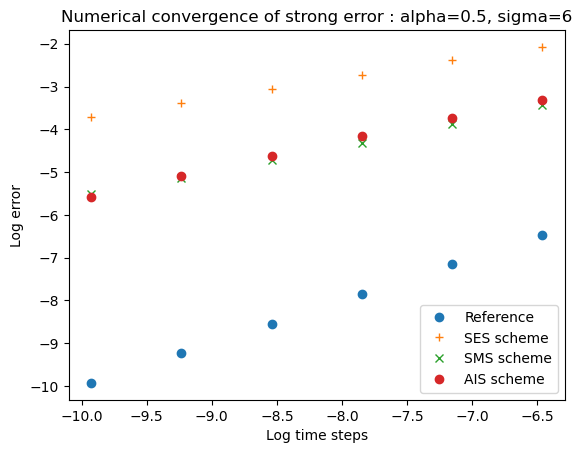

slope =  0.47408496200311195


In [55]:
from sklearn.metrics import r2_score



plt.plot(x,x,'o',label='Reference')

plt.plot(x,ySESAIS,'+',label='SES scheme')
plt.plot(x,ySMSAIS,'x',label="SMS scheme")
plt.plot(x,yAIS,'o',label="AIS scheme")
m, b = np.polyfit(x, ySESAIS, 1)
Z,l=np.polyfit(x,ySMSAIS,1)
u,o=np.polyfit(x,yAIS,1)
label_fit="Fit {:1.2f}".format(Z)
label_fit="Fit {:1.2f}".format(m)
r2_SES = r2_score(ySESAIS, m * x + b)
r2_SMS = r2_score(ySMSAIS, Z * x + l)
r2_AIS = r2_score(yAIS, u * x + o)


# Affichage des résultats
#label_fit_SES = f"Fit SES: {m:.2f}, R²: {r2_SES:.2f}"
#label_fit_SMS = f"Fit SMS: {Z:.2f}, R²: {r2_SMS:.2f}"

#plt.plot(x, m*x + b,label=label_fit)
#plt.plot(x, Z*x + l,label=label_fit)

k=0.5
n=6

plt.title("Numerical convergence of strong error : alpha={}, sigma={}".format(k,n))
plt.ylabel("Log error")
plt.xlabel("Log time steps")
plt.legend(loc="lower right")
plt.show()


In [142]:
print("Les R2 du SMS ,SES et AIS sont respectivement {} ,{} et {}".format(r2_SMS,r2_SES,r2_AIS))
print("Les p empiriques du SMS , SES et AIS sont respectivement {} ,{} et {}".format(Z,m,u))

Les R2 du SMS ,SES et AIS sont respectivement 0.9993939767370358 ,0.9999952342466277 et 0.9983770229139384
Les p empiriques du SMS , SES et AIS sont respectivement 0.5990133073127413 ,0.4651061394868751 et 0.6566240011886456


In [57]:
error,std_error,delta=estimate_strong_error_alpha05_CEV(5000,3,[8,16,32,64,128,256],"SES",RNG)
x=np.log(delta)
ySESAIS=np.log(error)
error,std_error,delta=estimate_strong_error_alpha05_CEV(5000,3,[8,16,32,64,128,256],"SMS",RNG)
ySMSAIS=np.log(error)
error,std_error,delta=estimate_strong_error_alpha05_CEV(5000,3,[8,16,32,64,128,256],"AIS",RNG)
yAIS=np.log(error)

100%|████████████████████████████████████████████████████████████████████████| 163840/163840 [00:36<00:00, 4500.08it/s]


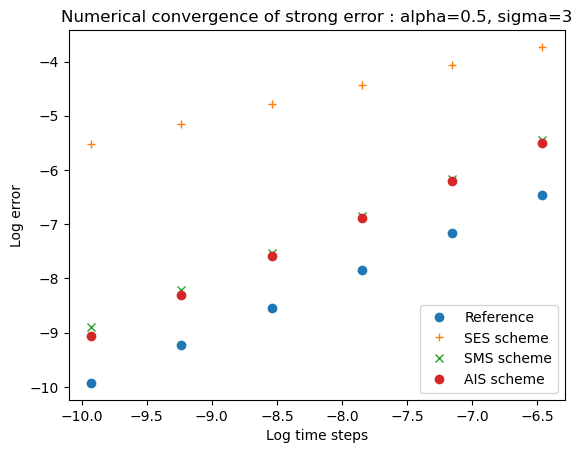

In [58]:

plt.plot(x,x,'o',label='Reference')

plt.plot(x,ySESAIS,'+',label='SES scheme')
plt.plot(x,ySMSAIS,'x',label="SMS scheme")
plt.plot(x,yAIS,'o',label="AIS scheme")
m, b = np.polyfit(x, ySESAIS, 1)
Z,l=np.polyfit(x,ySMSAIS,1)
u,o=np.polyfit(x,yAIS,1)
label_fit="Fit {:1.2f}".format(Z)
label_fit="Fit {:1.2f}".format(m)
r2_SES = r2_score(ySESAIS, m * x + b)
r2_SMS = r2_score(ySMSAIS, Z * x + l)
r2_AIS = r2_score(yAIS, u * x + o)


# Affichage des résultats
#label_fit_SES = f"Fit SES: {m:.2f}, R²: {r2_SES:.2f}"
#label_fit_SMS = f"Fit SMS: {Z:.2f}, R²: {r2_SMS:.2f}"

#plt.plot(x, m*x + b,label=label_fit)
#plt.plot(x, Z*x + l,label=label_fit)

k=0.5
n=3

plt.title("Numerical convergence of strong error : alpha={}, sigma={}".format(k,n))
plt.ylabel("Log error")
plt.xlabel("Log time steps")
plt.legend(loc="lower right")
plt.show()


In [29]:
print("Les R2 du SMS ,SES et AIS sont respectivement {} ,{} et {}".format(r2_SMS,r2_SES,r2_AIS))
print("Les p empiriques du SMS , SES et AIS sont respectivement {} ,{} et {}".format(Z,m,u))

Les R2 du SMS ,SES et AIS sont respectivement 0.9998858956630601 ,0.9999649855211 et 0.9998392521413536
Les p empiriques du SMS , SES et AIS sont respectivement 0.9871616388992589 ,0.5059193948509983 et 1.0207849647808822


In [62]:
error,std_error,delta=estimate_strong_error_alpha05_CEV(5000,2,[8,16,32,64,128,256],"SES",RNG)
x=np.log(delta)
ySESAIS=np.log(error)
error,std_error,delta=estimate_strong_error_alpha05_CEV(5000,2,[8,16,32,64,128,256],"SMS",RNG)
ySMSAIS=np.log(error)
error,std_error,delta=estimate_strong_error_alpha05_CEV(5000,2,[8,16,32,64,128,256],"AIS",RNG)
yAIS=np.log(error)

100%|████████████████████████████████████████████████████████████████████████| 163840/163840 [00:35<00:00, 4566.69it/s]


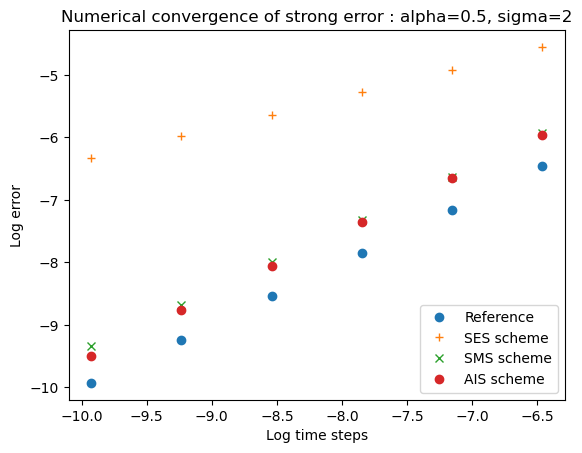

In [63]:

plt.plot(x,x,'o',label='Reference')

plt.plot(x,ySESAIS,'+',label='SES scheme')
plt.plot(x,ySMSAIS,'x',label="SMS scheme")
plt.plot(x,yAIS,'o',label="AIS scheme")
m, b = np.polyfit(x, ySESAIS, 1)
Z,l=np.polyfit(x,ySMSAIS,1)
u,o=np.polyfit(x,yAIS,1)
label_fit="Fit {:1.2f}".format(Z)
label_fit="Fit {:1.2f}".format(m)
r2_SES = r2_score(ySESAIS, m * x + b)
r2_SMS = r2_score(ySMSAIS, Z * x + l)
r2_AIS = r2_score(yAIS, u * x + o)


# Affichage des résultats
#label_fit_SES = f"Fit SES: {m:.2f}, R²: {r2_SES:.2f}"
#label_fit_SMS = f"Fit SMS: {Z:.2f}, R²: {r2_SMS:.2f}"

#plt.plot(x, m*x + b,label=label_fit)
#plt.plot(x, Z*x + l,label=label_fit)

k=0.5
n=2

plt.title("Numerical convergence of strong error : alpha={}, sigma={}".format(k,n))
plt.ylabel("Log error")
plt.xlabel("Log time steps")
plt.legend(loc="lower right")
plt.show()


In [64]:
print("Les R2 du SMS ,SES et AIS sont respectivement {} ,{} et {}".format(r2_SMS,r2_SES,r2_AIS))
print("Les p empiriques du SMS , SES et AIS sont respectivement {} ,{} et {}".format(Z,m,u))

Les R2 du SMS ,SES et AIS sont respectivement 0.9999427147509092 ,0.9998614851677619 et 0.9999182893907874
Les p empiriques du SMS , SES et AIS sont respectivement 0.9844342497935533 ,0.5120295352447981 et 1.0210756953835978


In [65]:
error,std_error,delta=estimate_strong_error_alpha05_CEV(5000,2.5,[8,16,32,64,128,256],"SES",RNG)
x=np.log(delta)
ySESAIS=np.log(error)
error,std_error,delta=estimate_strong_error_alpha05_CEV(5000,2.5,[8,16,32,64,128,256],"SMS",RNG)
ySMSAIS=np.log(error)
error,std_error,delta=estimate_strong_error_alpha05_CEV(5000,2.5,[8,16,32,64,128,256],"AIS",RNG)
yAIS=np.log(error)

100%|████████████████████████████████████████████████████████████████████████| 163840/163840 [00:35<00:00, 4582.73it/s]


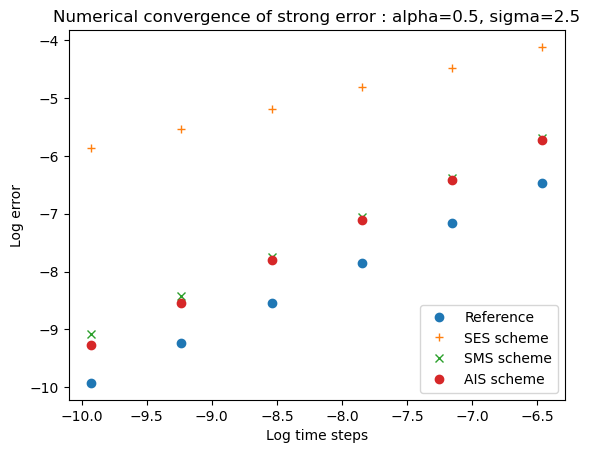

In [66]:

plt.plot(x,x,'o',label='Reference')

plt.plot(x,ySESAIS,'+',label='SES scheme')
plt.plot(x,ySMSAIS,'x',label="SMS scheme")
plt.plot(x,yAIS,'o',label="AIS scheme")
m, b = np.polyfit(x, ySESAIS, 1)
Z,l=np.polyfit(x,ySMSAIS,1)
u,o=np.polyfit(x,yAIS,1)
label_fit="Fit {:1.2f}".format(Z)
label_fit="Fit {:1.2f}".format(m)
r2_SES = r2_score(ySESAIS, m * x + b)
r2_SMS = r2_score(ySMSAIS, Z * x + l)
r2_AIS = r2_score(yAIS, u * x + o)


# Affichage des résultats
#label_fit_SES = f"Fit SES: {m:.2f}, R²: {r2_SES:.2f}"
#label_fit_SMS = f"Fit SMS: {Z:.2f}, R²: {r2_SMS:.2f}"

#plt.plot(x, m*x + b,label=label_fit)
#plt.plot(x, Z*x + l,label=label_fit)

k=0.5
n=2.5

plt.title("Numerical convergence of strong error : alpha={}, sigma={}".format(k,n))
plt.ylabel("Log error")
plt.xlabel("Log time steps")
plt.legend(loc="lower right")
plt.show()


In [67]:
print("Les R2 du SMS ,SES et AIS sont respectivement {} ,{} et {}".format(r2_SMS,r2_SES,r2_AIS))
print("Les p empiriques du SMS , SES et AIS sont respectivement {} ,{} et {}".format(Z,m,u))

Les R2 du SMS ,SES et AIS sont respectivement 0.9999505884130915 ,0.9998086704464174 et 0.9997698292006693
Les p empiriques du SMS , SES et AIS sont respectivement 0.9807477610470297 ,0.5061457251929314 et 1.0264370265515537
